# แตกไฟล์ avenue

In [3]:
import tarfile
import os

def extract_tar_gz(tar_file_path, extract_to_path=None):
    """
    แตกไฟล์ .tar.gz
    
    Args:
        tar_file_path (str): path ไปยังไฟล์ .tar.gz
        extract_to_path (str): path ที่จะแตกไฟล์ไป (ถ้าไม่ระบุจะแตกที่ตำแหน่งเดียวกับไฟล์)
    """
    
    # ตรวจสอบว่าไฟล์มีอยู่จริง
    if not os.path.exists(tar_file_path):
        print(f"ไม่พบไฟล์: {tar_file_path}")
        return False
    
    # กำหนด path ที่จะแตกไฟล์
    if extract_to_path is None:
        extract_to_path = os.path.dirname(tar_file_path)
        if extract_to_path == "":
            extract_to_path = "."
    
    # สร้างโฟลเดอร์ปลายทางถ้ายังไม่มี
    os.makedirs(extract_to_path, exist_ok=True)
    
    try:
        # เปิดและแตกไฟล์
        with tarfile.open(tar_file_path, 'r:gz') as tar:
            print(f"กำลังแตกไฟล์ {tar_file_path}...")
            
            # แสดงรายชื่อไฟล์ในไฟล์ tar
            print("ไฟล์ที่มีในไฟล์ tar:")
            members = tar.getmembers()
            for i, member in enumerate(members[:10]):  # แสดง 10 ไฟล์แรก
                print(f"  {member.name}")
            if len(members) > 10:
                print(f"  ... และอีก {len(members) - 10} ไฟล์")
            
            # แตกไฟล์
            tar.extractall(path=extract_to_path)
            
            print(f"แตกไฟล์เรียบร้อยแล้ว ไปยัง: {extract_to_path}")
            print(f"จำนวนไฟล์ทั้งหมด: {len(members)}")
            
            return True
            
    except tarfile.TarError as e:
        print(f"เกิดข้อผิดพลาดในการแตกไฟล์: {e}")
        return False
    except Exception as e:
        print(f"เกิดข้อผิดพลาด: {e}")
        return False

def list_tar_contents(tar_file_path):
    """
    ดูรายชื่อไฟล์ในไฟล์ tar.gz โดยไม่แตก
    """
    try:
        with tarfile.open(tar_file_path, 'r:gz') as tar:
            print(f"เนื้อหาในไฟล์ {tar_file_path}:")
            members = tar.getmembers()
            for member in members:
                print(f"  {member.name} ({'folder' if member.isdir() else 'file'}) - {member.size} bytes")
            print(f"จำนวนไฟล์/โฟลเดอร์ทั้งหมด: {len(members)}")
    except Exception as e:
        print(f"เกิดข้อผิดพลาด: {e}")

# การใช้งาน
if __name__ == "__main__":
    # ระบุ path ไปยังไฟล์ avenue.tar.gz
    tar_file = "/home/ubuntu/00_PHD_VAD/MNAD/data/avenue.tar.gz"
    
    # ดูเนื้อหาในไฟล์ก่อน (optional)
    print("=== ดูเนื้อหาในไฟล์ก่อนแตก ===")
    list_tar_contents(tar_file)
    
    print("\n=== แตกไฟล์ ===")
    # แตกไฟล์ไปยังโฟลเดอร์ปัจจุบัน
    success = extract_tar_gz(tar_file)
    
    # หรือแตกไปยังโฟลเดอร์เฉพาะ
    # success = extract_tar_gz(tar_file, "extracted_avenue")
    
    if success:
        print("การแตกไฟล์สำเร็จ!")
    else:
        print("การแตกไฟล์ไม่สำเร็จ!")

=== ดูเนื้อหาในไฟล์ก่อนแตก ===
เนื้อหาในไฟล์ /home/ubuntu/00_PHD_VAD/MNAD/data/avenue.tar.gz:
  avenue/avenue.mat (file) - 460 bytes
  avenue/testing (folder) - 0 bytes
  avenue/testing/frames (folder) - 0 bytes
  avenue/testing/frames/14 (folder) - 0 bytes
  avenue/testing/frames/14/284.jpg (file) - 73122 bytes
  avenue/testing/frames/14/490.jpg (file) - 76373 bytes
  avenue/testing/frames/14/295.jpg (file) - 73280 bytes
  avenue/testing/frames/14/213.jpg (file) - 72211 bytes
  avenue/testing/frames/14/325.jpg (file) - 75020 bytes
  avenue/testing/frames/14/326.jpg (file) - 75126 bytes
  avenue/testing/frames/14/192.jpg (file) - 70785 bytes
  avenue/testing/frames/14/088.jpg (file) - 72632 bytes
  avenue/testing/frames/14/503.jpg (file) - 76703 bytes
  avenue/testing/frames/14/013.jpg (file) - 72135 bytes
  avenue/testing/frames/14/064.jpg (file) - 74432 bytes
  avenue/testing/frames/14/224.jpg (file) - 71827 bytes
  avenue/testing/frames/14/293.jpg (file) - 72654 bytes
  avenue/testi

# ดู Label

In [5]:
import scipy.io
import numpy as np
import os

def inspect_mat_file(mat_file_path):
    """
    ตรวจสอบข้อมูลในไฟล์ .mat
    """
    print(f"=== ตรวจสอบไฟล์: {mat_file_path} ===")
    
    # ตรวจสอบว่าไฟล์มีอยู่
    if not os.path.exists(mat_file_path):
        print(f"ไม่พบไฟล์: {mat_file_path}")
        return
    
    try:
        # อ่านไฟล์ .mat
        mat_data = scipy.io.loadmat(mat_file_path)
        
        print(f"ขนาดไฟล์: {os.path.getsize(mat_file_path)} bytes")
        print(f"จำนวนตัวแปรในไฟล์: {len(mat_data)}")
        print()
        
        # แสดงรายชื่อตัวแปรทั้งหมด
        print("=== รายชื่อตัวแปรในไฟล์ ===")
        for key in mat_data.keys():
            value = mat_data[key]
            if isinstance(value, np.ndarray):
                print(f"ตัวแปร: '{key}'")
                print(f"  - Type: {type(value)}")
                print(f"  - Shape: {value.shape}")
                print(f"  - Data type: {value.dtype}")
                if value.size < 50:  # แสดงข้อมูลถ้าไม่เยอะมาก
                    print(f"  - ข้อมูล: {value}")
                else:
                    print(f"  - ข้อมูล (ตัวอย่าง): {value.flat[:10]}...")
                print()
            else:
                print(f"ตัวแปร: '{key}' = {value} (type: {type(value)})")
                print()
        
        # ดูข้อมูล labels โดยเฉพาะ (ถ้ามี)
        possible_label_keys = ['labels', 'label', 'gt', 'ground_truth', 'y', 'target']
        print("=== ค้นหา Label Data ===")
        
        found_labels = False
        for key in mat_data.keys():
            if any(label_key in key.lower() for label_key in possible_label_keys):
                print(f"พบ Label key: '{key}'")
                label_data = mat_data[key]
                print(f"  - Shape: {label_data.shape}")
                print(f"  - Unique values: {np.unique(label_data)}")
                print(f"  - Value counts:")
                unique, counts = np.unique(label_data, return_counts=True)
                for val, count in zip(unique, counts):
                    print(f"    {val}: {count} ครั้ง")
                found_labels = True
                print()
        
        if not found_labels:
            print("ไม่พบตัวแปรที่น่าจะเป็น labels")
            print("กำลังตรวจสอบตัวแปรทั้งหมดเพิ่มเติม...")
            for key, value in mat_data.items():
                if not key.startswith('__'):  # ข้าม metadata
                    if isinstance(value, np.ndarray) and len(value.shape) <= 2:
                        unique_vals = np.unique(value)
                        if len(unique_vals) <= 10:  # อาจเป็น categorical data
                            print(f"  '{key}' อาจเป็น labels: unique values = {unique_vals}")
        
        return mat_data
        
    except Exception as e:
        print(f"เกิดข้อผิดพลาดในการอ่านไฟล์: {e}")
        return None

def analyze_avenue_structure(data_path):
    """
    วิเคราะห์โครงสร้างข้อมูล avenue
    """
    print("=== โครงสร้างข้อมูล Avenue ===")
    
    # ตรวจสอบโครงสร้างโฟลเดอร์
    avenue_path = os.path.join(data_path, "avenue")
    if os.path.exists(avenue_path):
        print(f"พบโฟลเดอร์: {avenue_path}")
        
        for root, dirs, files in os.walk(avenue_path):
            level = root.replace(avenue_path, '').count(os.sep)
            indent = ' ' * 2 * level
            print(f"{indent}{os.path.basename(root)}/")
            
            subindent = ' ' * 2 * (level + 1)
            for file in files[:5]:  # แสดง 5 ไฟล์แรกในแต่ละโฟลเดอร์
                print(f"{subindent}{file}")
            if len(files) > 5:
                print(f"{subindent}... และอีก {len(files) - 5} ไฟล์")
    else:
        print(f"ไม่พบโฟลเดอร์: {avenue_path}")

# การใช้งาน
if __name__ == "__main__":
    # ระบุ path ไปยังไฟล์
    mat_file = "./data/avenue/avenue.mat"
    
    # ตรวจสอบไฟล์ mat
    mat_data = inspect_mat_file(mat_file)
    
    print("\n" + "="*50)
    
    # ตรวจสอบโครงสร้างโฟลเดอร์
    analyze_avenue_structure("./data")
    
    # ถ้าต้องการดูข้อมูลเพิ่มเติม
    if mat_data is not None:
        print("\n=== ตัวอย่างการเข้าถึงข้อมูล ===")
        print("# หากต้องการเข้าถึงข้อมูลเฉพาะ:")
        for key in mat_data.keys():
            if not key.startswith('__'):
                print(f"data['{key}'] = mat_data['{key}']")

=== ตรวจสอบไฟล์: ./data/avenue/avenue.mat ===
ขนาดไฟล์: 460 bytes
จำนวนตัวแปรในไฟล์: 4

=== รายชื่อตัวแปรในไฟล์ ===
ตัวแปร: '__header__' = b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Oct 23 20:15:43 2015' (type: <class 'bytes'>)

ตัวแปร: '__version__' = 1.0 (type: <class 'str'>)

ตัวแปร: '__globals__' = [] (type: <class 'list'>)

ตัวแปร: 'gt'
  - Type: <class 'numpy.ndarray'>
  - Shape: (1, 21)
  - Data type: object
  - ข้อมูล: [[array([[  78,  392,  503,  868,  932],
         [ 120,  422,  666,  910, 1101]], dtype=uint16)
  array([[ 273,  724, 1051],
         [ 320,  764, 1100]], dtype=uint16)
  array([[295, 582],
         [340, 622]], dtype=uint16) array([[380, 649],
                                           [428, 692]], dtype=uint16)
  array([[469],
         [786]], dtype=uint16) array([[ 345,  856],
                                      [ 625, 1007]], dtype=uint16)
  array([[423, 563],
         [494, 595]], dtype=uint16) array([[21],
                                 

# ดูรายละเอียด พร้อมกราฟ

Starting Avenue Dataset Analysis...
Ground truth data loaded: Shape (1, 21)
Number of videos with annotations: 21
AVENUE DATASET ANALYSIS REPORT

📊 BASIC STATISTICS:
Training videos: 16
Testing videos: 21
Total training frames: 15,328
Total testing frames: 15,324
Total frames: 30,652

🎬 TRAINING SET FRAME STATISTICS:
Min frames per video: 145
Max frames per video: 1511
Average frames per video: 958.0
Median frames per video: 1058.0

🧪 TESTING SET FRAME STATISTICS:
Min frames per video: 36
Max frames per video: 1439
Average frames per video: 729.7
Median frames per video: 740.0

🚨 ANOMALY STATISTICS:
Videos with anomalies: 21/21
Total anomaly segments: 47
Total anomaly frames: 3867.0
Anomaly ratio: 25.23%

Generating visualizations...


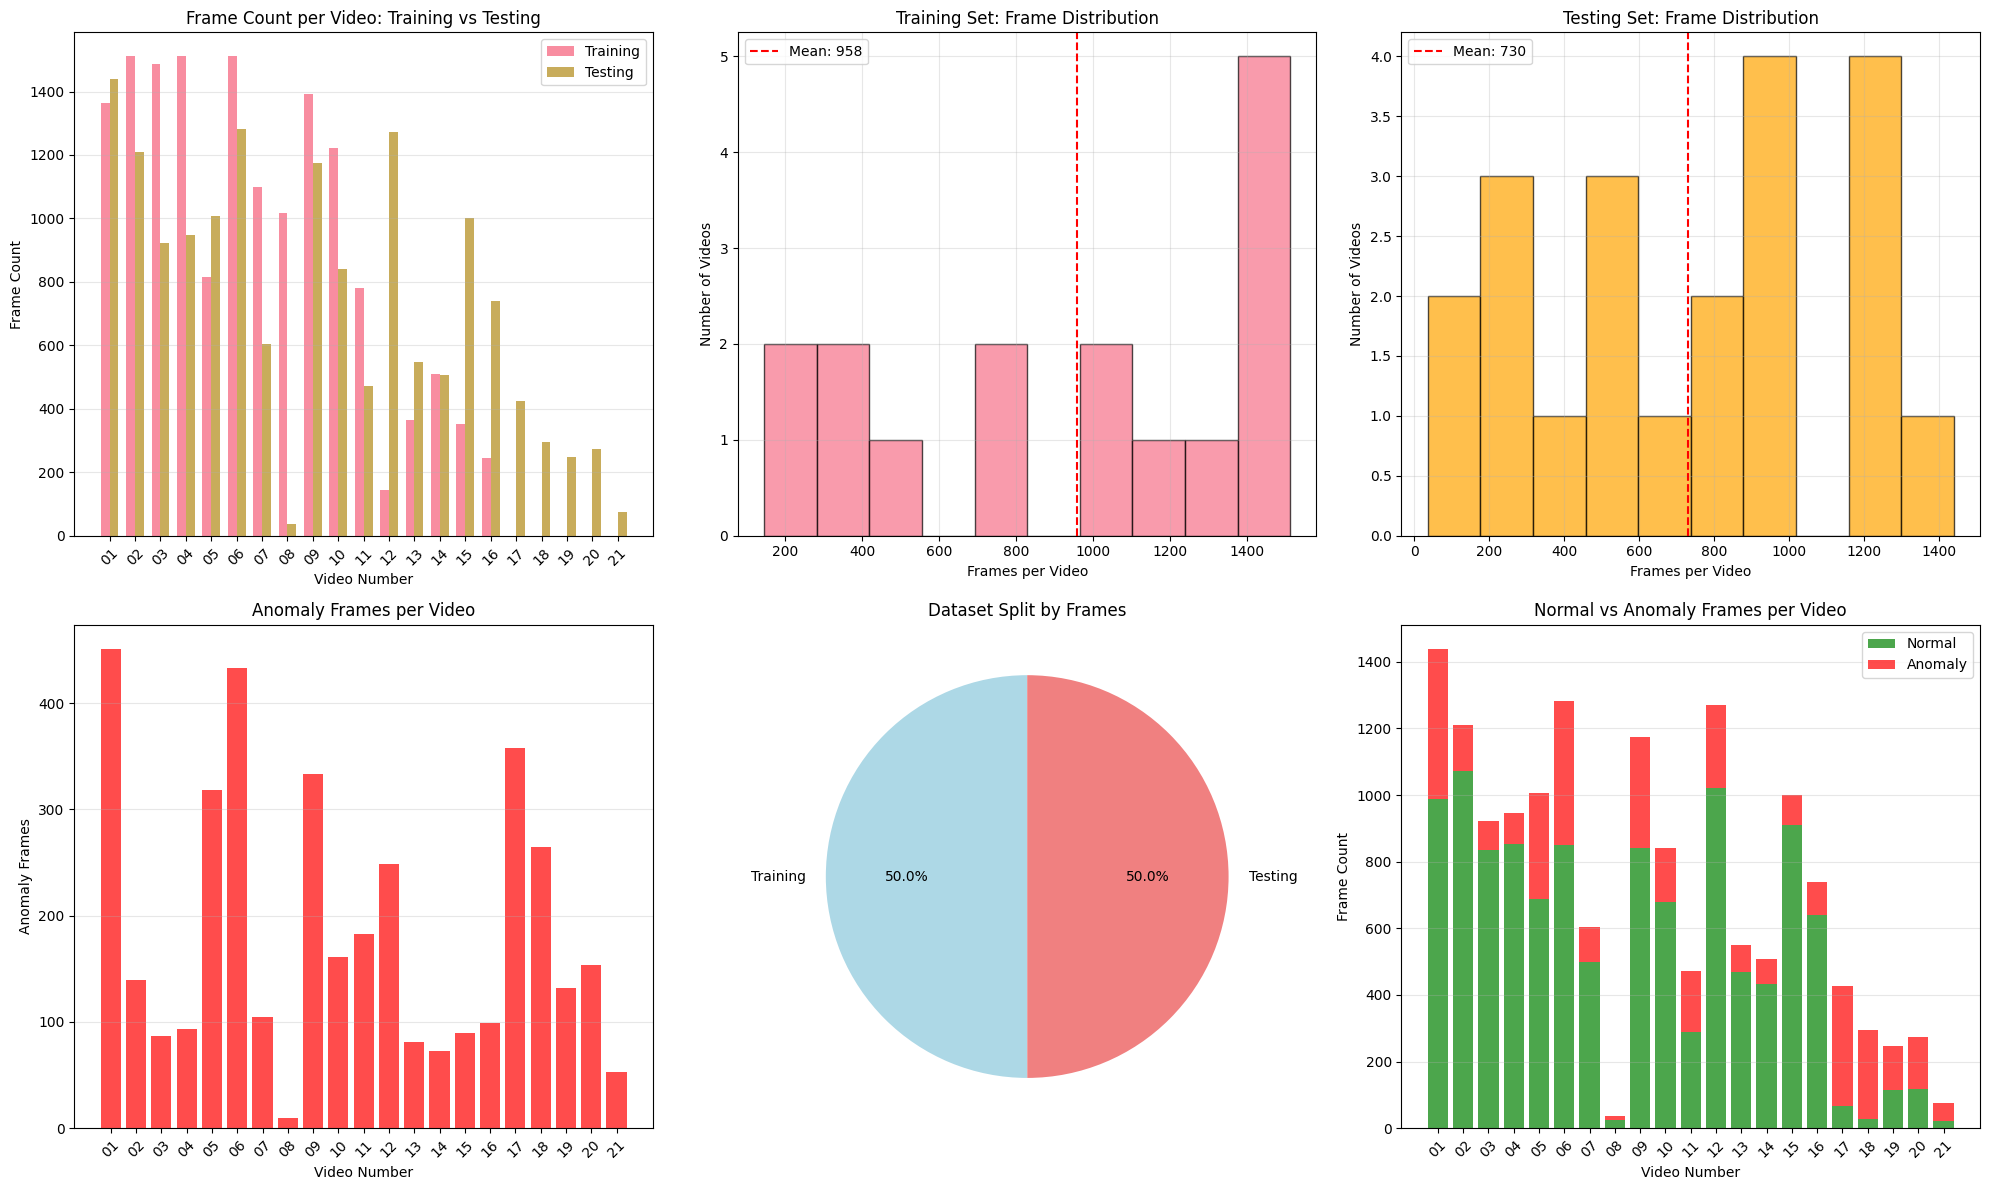


Exporting labels file...
Labels exported to: ./data/frame_labels_avenue.npy
Total frames: 15324
Anomaly frames: 3867
Normal frames: 11457
Anomaly ratio: 25.23%

✅ Analysis complete!
📊 Visualization saved as: avenue_dataset_analysis.png
🏷️ Labels file saved as: ./data/frame_labels_avenue.npy


In [7]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import glob
from collections import defaultdict

class AvenueDatasetAnalyzer:
    def __init__(self, data_path="./data/avenue"):
        self.data_path = data_path
        self.mat_file = os.path.join(data_path, "avenue.mat")
        self.training_path = os.path.join(data_path, "training/frames")
        self.testing_path = os.path.join(data_path, "testing/frames")
        
        # Load ground truth data
        self.gt_data = None
        self.load_ground_truth()
        
        # Analyze frame counts
        self.training_stats = self.analyze_frames(self.training_path)
        self.testing_stats = self.analyze_frames(self.testing_path)
        
    def load_ground_truth(self):
        """Load and parse ground truth data from .mat file"""
        try:
            mat_data = scipy.io.loadmat(self.mat_file)
            self.gt_data = mat_data['gt']
            print(f"Ground truth data loaded: Shape {self.gt_data.shape}")
            print(f"Number of videos with annotations: {len(self.gt_data[0])}")
        except Exception as e:
            print(f"Error loading ground truth: {e}")
            
    def analyze_frames(self, frames_path):
        """Analyze frame counts for each video folder"""
        stats = {}
        if not os.path.exists(frames_path):
            print(f"Path not found: {frames_path}")
            return stats
            
        video_folders = sorted([d for d in os.listdir(frames_path) 
                               if os.path.isdir(os.path.join(frames_path, d))])
        
        for video_folder in video_folders:
            video_path = os.path.join(frames_path, video_folder)
            frame_files = glob.glob(os.path.join(video_path, "*.jpg"))
            stats[video_folder] = len(frame_files)
            
        return stats
    
    def analyze_anomaly_annotations(self):
        """Analyze anomaly annotations from ground truth"""
        if self.gt_data is None:
            return None
            
        anomaly_stats = []
        
        for i, video_gt in enumerate(self.gt_data[0]):
            video_num = f"{i+1:02d}"
            
            if video_gt.size > 0:
                # Each video_gt contains start and end frame numbers for anomalous segments
                if len(video_gt.shape) == 2 and video_gt.shape[0] == 2:
                    start_frames = video_gt[0]
                    end_frames = video_gt[1]
                    
                    anomaly_segments = len(start_frames)
                    total_anomaly_frames = np.sum(end_frames - start_frames + 1)
                    
                    anomaly_stats.append({
                        'video': video_num,
                        'segments': anomaly_segments,
                        'anomaly_frames': total_anomaly_frames,
                        'start_frames': start_frames.tolist(),
                        'end_frames': end_frames.tolist()
                    })
                else:
                    anomaly_stats.append({
                        'video': video_num,
                        'segments': 0,
                        'anomaly_frames': 0,
                        'start_frames': [],
                        'end_frames': []
                    })
            
        return anomaly_stats
    
    def create_summary_report(self):
        """Create a comprehensive summary report"""
        print("="*60)
        print("AVENUE DATASET ANALYSIS REPORT")
        print("="*60)
        
        # Basic statistics
        train_videos = len(self.training_stats)
        test_videos = len(self.testing_stats)
        total_train_frames = sum(self.training_stats.values())
        total_test_frames = sum(self.testing_stats.values())
        
        print(f"\n📊 BASIC STATISTICS:")
        print(f"Training videos: {train_videos}")
        print(f"Testing videos: {test_videos}")
        print(f"Total training frames: {total_train_frames:,}")
        print(f"Total testing frames: {total_test_frames:,}")
        print(f"Total frames: {total_train_frames + total_test_frames:,}")
        
        # Frame statistics
        if self.training_stats:
            train_frames = list(self.training_stats.values())
            print(f"\n🎬 TRAINING SET FRAME STATISTICS:")
            print(f"Min frames per video: {min(train_frames)}")
            print(f"Max frames per video: {max(train_frames)}")
            print(f"Average frames per video: {np.mean(train_frames):.1f}")
            print(f"Median frames per video: {np.median(train_frames):.1f}")
        
        if self.testing_stats:
            test_frames = list(self.testing_stats.values())
            print(f"\n🧪 TESTING SET FRAME STATISTICS:")
            print(f"Min frames per video: {min(test_frames)}")
            print(f"Max frames per video: {max(test_frames)}")
            print(f"Average frames per video: {np.mean(test_frames):.1f}")
            print(f"Median frames per video: {np.median(test_frames):.1f}")
        
        # Anomaly analysis
        anomaly_stats = self.analyze_anomaly_annotations()
        if anomaly_stats:
            total_anomaly_frames = sum([stat['anomaly_frames'] for stat in anomaly_stats])
            total_segments = sum([stat['segments'] for stat in anomaly_stats])
            videos_with_anomalies = len([stat for stat in anomaly_stats if stat['segments'] > 0])
            
            print(f"\n🚨 ANOMALY STATISTICS:")
            print(f"Videos with anomalies: {videos_with_anomalies}/{len(anomaly_stats)}")
            print(f"Total anomaly segments: {total_segments}")
            print(f"Total anomaly frames: {total_anomaly_frames}")
            print(f"Anomaly ratio: {total_anomaly_frames/total_test_frames*100:.2f}%")
        
        return {
            'training_stats': self.training_stats,
            'testing_stats': self.testing_stats,
            'anomaly_stats': anomaly_stats,
            'summary': {
                'train_videos': train_videos,
                'test_videos': test_videos,
                'total_train_frames': total_train_frames,
                'total_test_frames': total_test_frames
            }
        }
    
    def create_visualizations(self):
        """Create comprehensive visualizations"""
        # Set up the plotting style
        plt.style.use('default')
        sns.set_palette("husl")
        
        fig = plt.figure(figsize=(20, 12))
        
        # 1. Frame count comparison (Training vs Testing)
        plt.subplot(2, 3, 1)
        videos = sorted(set(self.training_stats.keys()) | set(self.testing_stats.keys()))
        train_counts = [self.training_stats.get(v, 0) for v in videos]
        test_counts = [self.testing_stats.get(v, 0) for v in videos]
        
        x = np.arange(len(videos))
        width = 0.35
        
        plt.bar(x - width/2, train_counts, width, label='Training', alpha=0.8)
        plt.bar(x + width/2, test_counts, width, label='Testing', alpha=0.8)
        plt.xlabel('Video Number')
        plt.ylabel('Frame Count')
        plt.title('Frame Count per Video: Training vs Testing')
        plt.xticks(x, videos, rotation=45)
        plt.legend()
        plt.grid(axis='y', alpha=0.3)
        
        # 2. Training set distribution
        plt.subplot(2, 3, 2)
        train_values = list(self.training_stats.values())
        plt.hist(train_values, bins=10, alpha=0.7, edgecolor='black')
        plt.xlabel('Frames per Video')
        plt.ylabel('Number of Videos')
        plt.title('Training Set: Frame Distribution')
        plt.axvline(np.mean(train_values), color='red', linestyle='--', 
                   label=f'Mean: {np.mean(train_values):.0f}')
        plt.legend()
        plt.grid(alpha=0.3)
        
        # 3. Testing set distribution
        plt.subplot(2, 3, 3)
        test_values = list(self.testing_stats.values())
        plt.hist(test_values, bins=10, alpha=0.7, edgecolor='black', color='orange')
        plt.xlabel('Frames per Video')
        plt.ylabel('Number of Videos')
        plt.title('Testing Set: Frame Distribution')
        plt.axvline(np.mean(test_values), color='red', linestyle='--',
                   label=f'Mean: {np.mean(test_values):.0f}')
        plt.legend()
        plt.grid(alpha=0.3)
        
        # 4. Anomaly analysis
        plt.subplot(2, 3, 4)
        anomaly_stats = self.analyze_anomaly_annotations()
        if anomaly_stats:
            videos = [stat['video'] for stat in anomaly_stats]
            anomaly_counts = [stat['anomaly_frames'] for stat in anomaly_stats]
            
            colors = ['red' if count > 0 else 'green' for count in anomaly_counts]
            plt.bar(videos, anomaly_counts, color=colors, alpha=0.7)
            plt.xlabel('Video Number')
            plt.ylabel('Anomaly Frames')
            plt.title('Anomaly Frames per Video')
            plt.xticks(rotation=45)
            plt.grid(axis='y', alpha=0.3)
        
        # 5. Dataset split pie chart
        plt.subplot(2, 3, 5)
        total_train = sum(self.training_stats.values())
        total_test = sum(self.testing_stats.values())
        sizes = [total_train, total_test]
        labels = ['Training', 'Testing']
        colors = ['lightblue', 'lightcoral']
        
        plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
        plt.title('Dataset Split by Frames')
        
        # 6. Anomaly ratio analysis
        plt.subplot(2, 3, 6)
        if anomaly_stats:
            normal_frames = []
            anomaly_frames = []
            video_labels = []
            
            for stat in anomaly_stats:
                video_num = stat['video']
                total_frames = self.testing_stats.get(video_num, 0)
                anom_frames = stat['anomaly_frames']
                norm_frames = total_frames - anom_frames
                
                if total_frames > 0:
                    normal_frames.append(norm_frames)
                    anomaly_frames.append(anom_frames)
                    video_labels.append(video_num)
            
            x = np.arange(len(video_labels))
            plt.bar(x, normal_frames, label='Normal', alpha=0.7, color='green')
            plt.bar(x, anomaly_frames, bottom=normal_frames, label='Anomaly', alpha=0.7, color='red')
            
            plt.xlabel('Video Number')
            plt.ylabel('Frame Count')
            plt.title('Normal vs Anomaly Frames per Video')
            plt.xticks(x, video_labels, rotation=45)
            plt.legend()
            plt.grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('avenue_dataset_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
    def export_label_file(self, output_path="./data/frame_labels_avenue.npy"):
        """Export labels in the format expected by MNAD"""
        if self.gt_data is None:
            print("No ground truth data available")
            return
            
        # Create binary labels for each frame in each testing video
        all_labels = []
        
        for i, video_gt in enumerate(self.gt_data[0]):
            video_num = f"{i+1:02d}"
            total_frames = self.testing_stats.get(video_num, 0)
            
            if total_frames == 0:
                continue
                
            # Initialize all frames as normal (0)
            video_labels = np.zeros(total_frames, dtype=np.int32)
            
            if video_gt.size > 0 and len(video_gt.shape) == 2 and video_gt.shape[0] == 2:
                start_frames = video_gt[0]
                end_frames = video_gt[1]
                
                # Mark anomalous frames as 1
                for start, end in zip(start_frames, end_frames):
                    # Convert to 0-based indexing
                    start_idx = max(0, start - 1)
                    end_idx = min(total_frames, end)
                    video_labels[start_idx:end_idx] = 1
            
            all_labels.extend(video_labels)
        
        # Convert to numpy array and save
        labels_array = np.array([all_labels])  # Shape: (1, total_frames)
        np.save(output_path, labels_array)
        
        print(f"Labels exported to: {output_path}")
        print(f"Total frames: {len(all_labels)}")
        print(f"Anomaly frames: {np.sum(labels_array)}")
        print(f"Normal frames: {len(all_labels) - np.sum(labels_array)}")
        print(f"Anomaly ratio: {np.sum(labels_array)/len(all_labels)*100:.2f}%")
        
        return labels_array

def main():
    """Main function to run the analysis"""
    print("Starting Avenue Dataset Analysis...")
    
    # Initialize analyzer
    analyzer = AvenueDatasetAnalyzer()
    
    # Create summary report
    summary = analyzer.create_summary_report()
    
    # Create visualizations
    print("\nGenerating visualizations...")
    analyzer.create_visualizations()
    
    # Export labels file
    print("\nExporting labels file...")
    analyzer.export_label_file()
    
    print("\n✅ Analysis complete!")
    print("📊 Visualization saved as: avenue_dataset_analysis.png")
    print("🏷️ Labels file saved as: ./data/frame_labels_avenue.npy")
    
    return summary

if __name__ == "__main__":
    summary = main()

In [11]:
# ตรวจสอบว่าไฟล์ที่จำเป็นมีครบ
!ls ./data/frame_labels_avenue.npy
!ls ./data/avenue/training/frames/
!ls ./data/avenue/testing/frames/

# ตรวจสอบ GPU
!nvidia-smi

./data/frame_labels_avenue.npy
01  02	03  04	05  06	07  08	09  10	11  12	13  14	15  16
01  03	05  07	09  11	13  15	17  19	21
02  04	06  08	10  12	14  16	18  20
Thu Sep 18 17:35:10 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 575.64.03              Driver Version: 575.64.03      CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4090        Off |   00000000:01:00.0 Off |                  Off |
|  0%   46C    P8             20W /  480W |       4MiB /  24564MiB |    

# Train

In [13]:
!python main.py --mode train_avenue

Starting enhanced training...
Setting up dataset from ./data/avenue/training/frames
Found 16 videos
Processing videos: 100%|██████████████████████| 16/16 [00:00<00:00, 1423.15it/s]
Total frames loaded: 15328
Setting up dataset from ./data/avenue/testing/frames
Found 21 videos
Processing videos: 100%|██████████████████████| 21/21 [00:00<00:00, 1888.48it/s]
Total frames loaded: 15324
Training samples: 15264
Testing samples: 15240
Batches per epoch: 954
Epoch 1/3: 100%|█| 954/954 [03:48<00:00,  4.18it/s, Loss=0.0017, Pixel=0.0007, C
Epoch 2/3: 100%|█| 954/954 [03:43<00:00,  4.27it/s, Loss=0.0007, Pixel=0.0006, C
Epoch 3/3: 100%|█| 954/954 [03:43<00:00,  4.26it/s, Loss=0.0007, Pixel=0.0006, C
Training completed! Results saved in: ./exp/avenue/pred/avenue_rtx4090_v3
Training completed successfully!


#   Ours-P w/ Mem ( มี Memory Module)

In [15]:
!python main.py --mode test_avenue

Starting Avenue dataset testing with predefined configuration...
Starting testing with Avenue configuration...
Dataset: avenue
Method: pred
Image size: 320x320
Memory size: 20
Alpha: 0.6
Threshold: 0.01
Model path: ./exp/avenue/pred/avenue_rtx4090_v3/model.pth
Memory items path: ./exp/avenue/pred/avenue_rtx4090_v3/keys.pt
Setting up dataset from ./data/avenue/testing/frames
Found 21 videos
Processing videos: 100%|██████████████████████| 21/21 [00:00<00:00, 1863.15it/s]
Total frames loaded: 15324
Loading model from: ./exp/avenue/pred/avenue_rtx4090_v3/model.pth
Loading memory items from: ./exp/avenue/pred/avenue_rtx4090_v3/keys.pt

MEMORY MODULE DIAGNOSTICS
Original Memory Shape: torch.Size([20, 512])
Memory Values Range: -0.2275 to 0.2035
Memory Mean: -0.0000
Memory Std: 0.0442
Model has memory module: True
Memory module type: <class '__main__.Memory'>
Memory size config: 20
Found 21 test videos
Evaluation of avenue
Testing Progress: 100%|█| 15240/15240 [01:52<00:00, 134.97it/s, Video=